In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import plotly

In [382]:
#Filter the data to include only rows where Year is 1962
#make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap for the filtered data.
df = pd.read_csv('gapminder_clean.csv', index_col=[0])

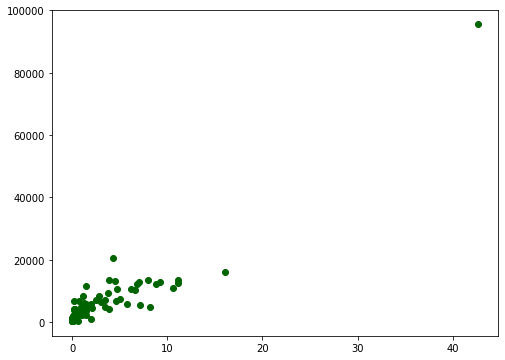

In [257]:
df62=df.loc[np.where((df['Year']==1962))]
plt.figure(figsize=(8,6))
co2=df62['CO2 emissions (metric tons per capita)']
gdp=df62['gdpPercap']
plt.scatter(co2, gdp, c='darkgreen')
plt.ylabel('')

In [258]:
# What is the Pearson R value and associated p value?
pg.corr(co2, gdp)

,n,r,CI95%,p-val,BF10,power
pearson,108,0.926082,"[0.89, 0.95]",1.128679e-46,1.312e+43,1.0


In [259]:
#On the unfiltered data, answer "In what year is the correlation between 
#'CO2 emissions (metric tons per capita)' and gdpPercap the strongest?" 
#Filter the dataset to that year for the next step 
yrs=list(df['Year'].value_counts().index)

In [260]:
ls=[]
for y in yrs: 
    a=df.loc[np.where((df['Year']==y))]
    c=pg.corr(a['CO2 emissions (metric tons per capita)'], a['gdpPercap'])
    c['year']=y
    ls.append(c)

In [261]:
pd.concat(ls).sort_values(by=['p-val'], ascending=True) #1967 

,n,r,CI95%,p-val,BF10,power,year
pearson,113,0.938792,"[0.91, 0.96]",3.397143e-53,3.423e+49,1.0,1967
pearson,108,0.926082,"[0.89, 0.95]",1.128679e-46,1.312e+43,1.0,1962
pearson,116,0.842899,"[0.78, 0.89]",1.824292e-32,1.67e+29,1.0,1972
pearson,124,0.808140,"[0.74, 0.86]",7.976156e-30,4.444e+26,1.0,1997
pearson,122,0.809432,"[0.74, 0.86]",1.610614e-29,2.221e+26,1.0,1992
pearson,125,0.800642,"[0.73, 0.86]",3.863564e-29,9.498e+25,1.0,2002
pearson,116,0.816638,"[0.75, 0.87]",5.565916e-29,6.485e+25,1.0,1982
pearson,116,0.809553,"[0.74, 0.86]",3.899627e-28,9.653e+24,1.0,1987
pearson,116,0.792834,"[0.71, 0.85]",2.838892e-26,1.457e+23,1.0,1977
pearson,128,0.720417,"[0.63, 0.79]",9.232747e-22,5.735e+18,1.0,2007


In [381]:
import plotly.express as px

In [263]:
#relationship between continent and 'Energy use (kg of oil equivalent per capita)'
mod=pg.kruskal(data=df, between='continent', dv='Energy use (kg of oil equivalent per capita)')
mod
#tests the null hypothesis that the population median (energy use) of all of the groups are equal. 
#It is a non-parametric version of ANOVA. It does not assume normal distribution of residuals
#The test works on 2 or more independent samples, which may have different sizes.

,Source,ddof1,H,p-unc
Kruskal,continent,4,318.676317,1.012404e-67


In [265]:
#Is there a significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)'
#in the years after 1990? (Stats test needed)
df90=df.loc[np.where((df['Year']>1990))]
df90=df90[df90['continent'].isin(['Europe', 'Asia'])]
df90=df90.replace({'Europe':1, 'Asia': 0})
df90=df90.dropna()
mod=pg.linear_regression(df90['continent'], df90['Imports of goods and services (% of GDP)'].to_numpy())
mod

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,46.474503,3.202656,14.511238,1.456183e-31,0.007808,0.001972,40.152406,52.796600
1,continent,-4.882679,4.221404,-1.156648,2.490389e-01,0.007808,0.001972,-13.215801,3.450443


Text(0, 0.5, 'People per sq. km of land area')

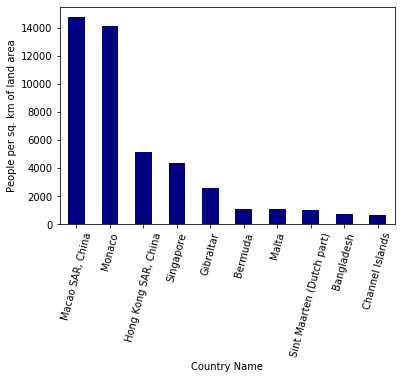

In [380]:
d=df.groupby(['Country Name']).agg({'Population density (people per sq. km of land area)': 'mean'}).sort_values(
    by=['Population density (people per sq. km of land area)'], ascending=False)
d.head(10).plot(legend=False, kind='bar', rot=75, color='navy')
plt.ylabel('People per sq. km of land area')

#country has the highest average ranking in population density is Macao

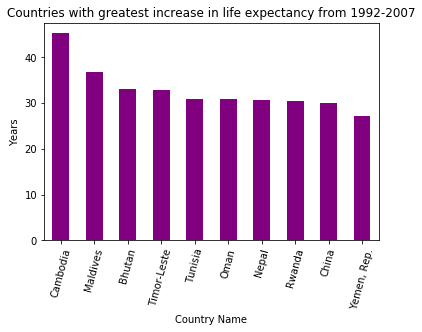

In [378]:
#What country (or countries) has shown the greatest increase 
#in 'Life expectancy at birth, total (years)' since 1962
var='Life expectancy at birth, total (years)'
# d
d=df.groupby(['Country Name']).agg({var: np.ptp})
# d.dropna().sort_values(by=[var], ascending=False)
# #d.head(10).plot(legend=False, kind='bar', rot=75, color='navy')
d=d.sort_values(by=[var], ascending=False).head(10)
d.head(10).plot(legend=False, kind='bar', rot=75, color='purple')
plt.title('Countries with greatest increase in life expectancy from 1992-2007')
plt.ylabel('Years')
countryLs=list(d.index)
dfYrs = df[df['Country Name'].isin(countryLs)]
yr62=(dfYrs[dfYrs['Year']==1962][var])
yr07=(dfYrs[dfYrs['Year']==2007][var])

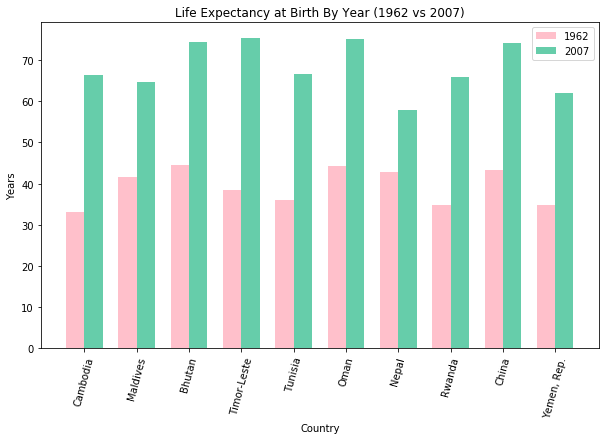

In [371]:
N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, yr62, width, color='pink', )
rects2 = ax.bar(ind+width, yr07, width, color='mediumaquamarine')

ax.set_ylabel('Years')
ax.set_xlabel('Country')
ax.set_title('Life Expectancy at Birth By Year (1962 vs 2007)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( countryLs , rotation=75)
ax.legend( (rects1[0], rects2[0]), ('1962', '2007') )